In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling



# Importing the data

## Checking dimension, structure, length of the data and loading it

Here I will use a shell-Linux command to check the first 3 lines of the file and the length of the document 🔍

In [2]:
!head --lines=3 ../raw_data/PM_train.txt

1 1 -0.0007 -0.0004 100.0 518.67 641.82 1589.70 1400.60 14.62 21.61 554.36 2388.06 9046.19 1.30 47.47 521.66 2388.02 8138.62 8.4195 0.03 392 2388 100.00 39.06 23.4190  
1 2 0.0019 -0.0003 100.0 518.67 642.15 1591.82 1403.14 14.62 21.61 553.75 2388.04 9044.07 1.30 47.49 522.28 2388.07 8131.49 8.4318 0.03 392 2388 100.00 39.00 23.4236  
1 3 -0.0043 0.0003 100.0 518.67 642.35 1587.99 1404.20 14.62 21.61 554.26 2388.08 9052.94 1.30 47.27 522.42 2388.03 8133.23 8.4178 0.03 390 2388 100.00 38.95 23.3442  


In [3]:
!wc --lines ../raw_data/PM_train.txt

20631 ../raw_data/PM_train.txt


The data structure is a text file with a visual pattern: for each variable value, it is separated by a blank space, and at the end of each observation a line break, the `read_csv()` can do the job with the separator specified:

In [4]:
# define column names for easy indexing
index_names = ['Asset id', 'runtime']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['Tag'+str(n) for n in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train_data = pd.read_csv('../raw_data/PM_train.txt', sep='\s+', header=None, names=col_names)
test_data = pd.read_csv('../raw_data/PM_train.txt', sep='\s+', header=None, names=col_names)

train_data.head()

,Asset id,runtime,setting_1,setting_2,setting_3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# Exploratory Data Analysis

In [6]:
# This is an automated exploratory analysis with Pandas profiling package, 
# these reports will be available in the repo for more detailed summary statistics

profile_test = test_data.profile_report(title='Report for test data')
profile_test.to_file(output_file='../reports/test_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Assets and Runtimes

The dataset contains 20631 observations, each one related to an asset execution. These are recognized by their ID, totaling 100 assets.

So, let's visualize the number of operations performed for each asset and observe some general statistics about it.

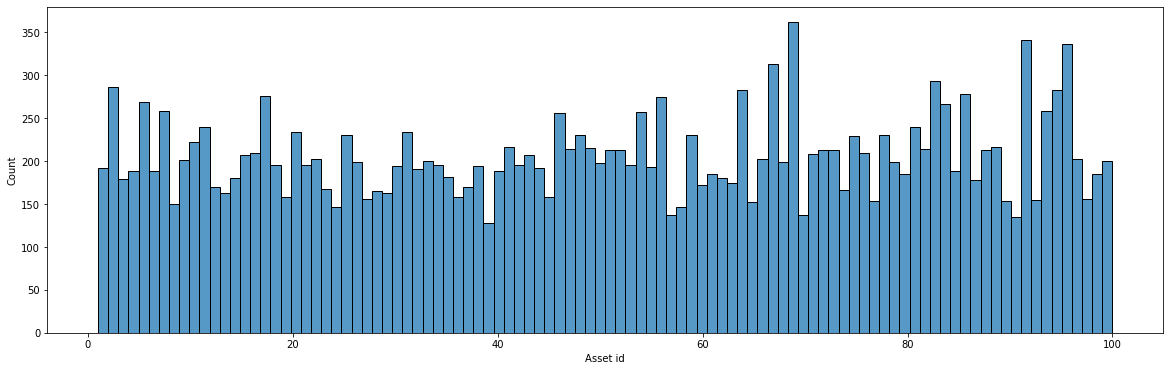

In [12]:
# Let's plot the distribution for each asset, this represents the duration of each before it crashes
plt.figure(figsize=(20,6))
sns.histplot(x='Asset id',
             data=train_data,
             bins=100);

In [30]:
# Here we can observe the minimum, maximum and average duration for each asset

train_data[index_names].groupby('Asset id').max().describe()

,runtime
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


These statistics suggest that, on average, assets last between 199 and 209 runtimes. We can also see that the asset that failed the earliest was consumed only 128 times, and the longest was used 362 times.

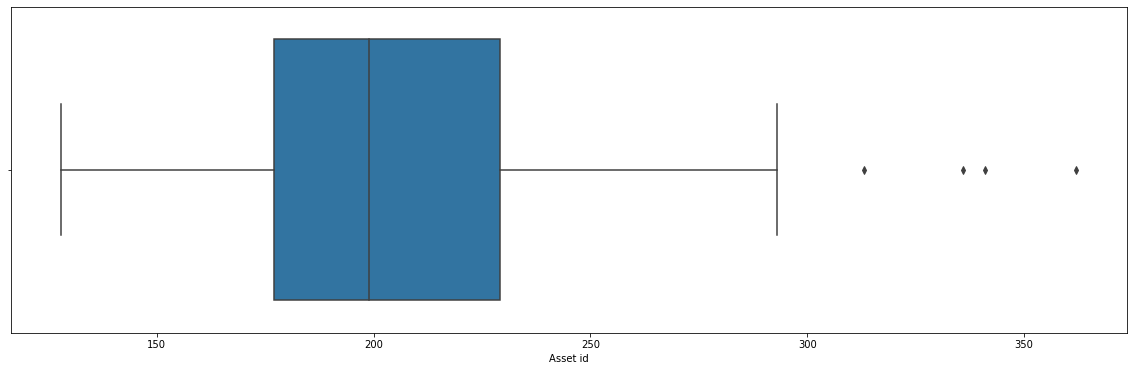

In [34]:
# As always, it's better when visualized

plt.figure(figsize=(20,6))
sns.boxplot(x=train_data['Asset id'].value_counts());

## Settings

The second layer of the dataset is the Settings used to run each asset, let's see:

In [31]:
# Summary
train_data[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


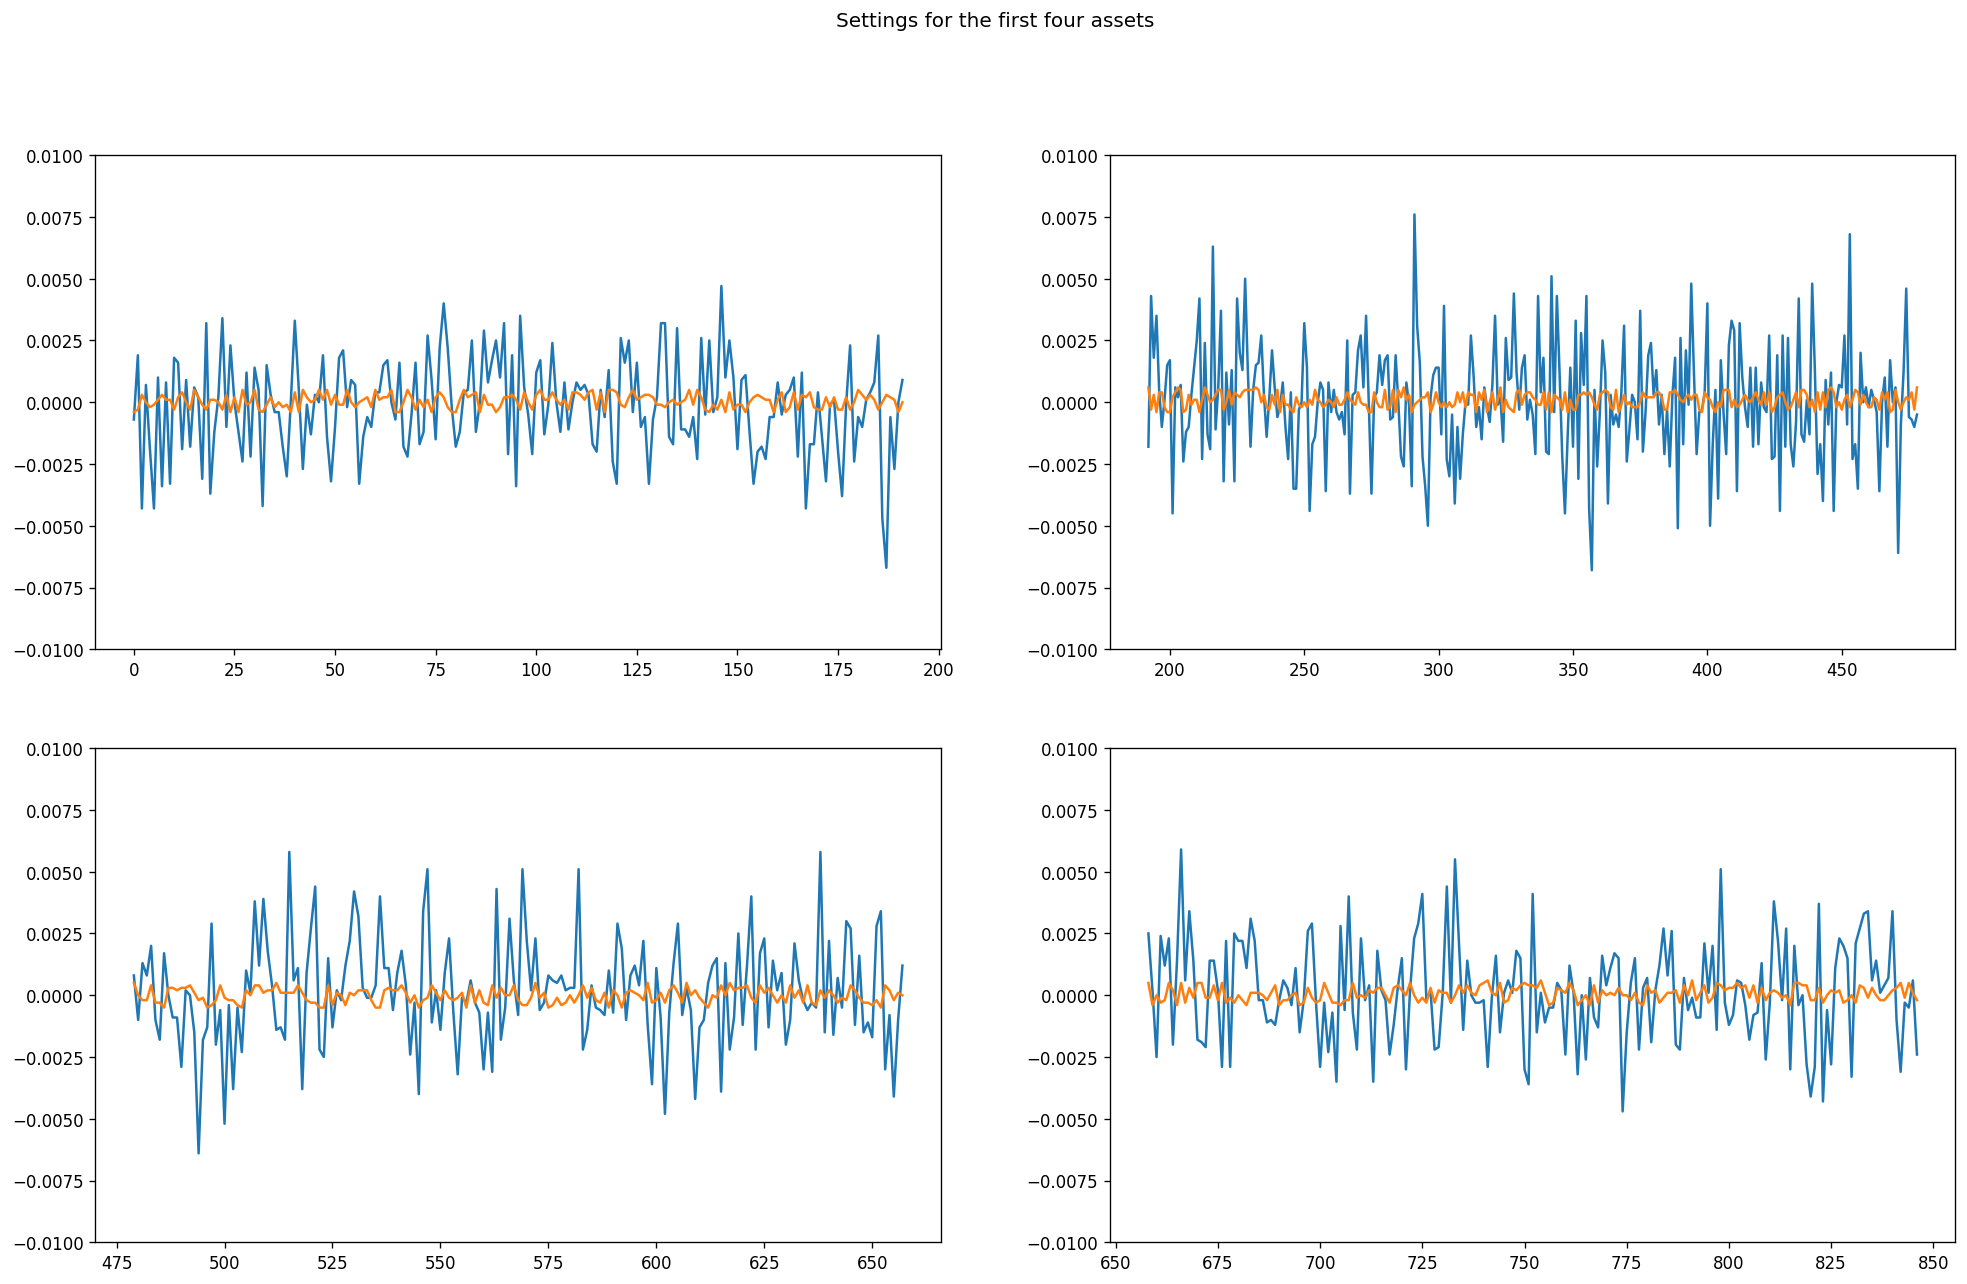

In [80]:
# For visualization purpose I will plot the first four assets settings
# I know, I know, we need more colorful insights here, but time is short

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,12), dpi=120)
fig.suptitle('Settings for the first four assets')
ax1.plot(train_data.loc[train_data['Asset id'] == 1]['setting_1'])
ax1.plot(train_data.loc[train_data['Asset id'] == 1]['setting_2'])
ax1.set_ylim(-0.01, 0.01)
ax2.plot(train_data.loc[train_data['Asset id'] == 2]['setting_1'])
ax2.plot(train_data.loc[train_data['Asset id'] == 2]['setting_2'])
ax2.set_ylim(-0.01, 0.01)
ax3.plot(train_data.loc[train_data['Asset id'] == 3]['setting_1'])
ax3.plot(train_data.loc[train_data['Asset id'] == 3]['setting_2'])
ax3.set_ylim(-0.01, 0.01)
ax4.plot(train_data.loc[train_data['Asset id'] == 4]['setting_1'])
ax4.plot(train_data.loc[train_data['Asset id'] == 4]['setting_2'])
ax4.set_ylim(-0.01, 0.01);

As we can see from the standard deviation, there are no considerable changes in the settings pattern. This suggests (and only suggests as we don't have more details on what exactly these settings are) that the assets are used within a stable production line with little variation.

## Tags

Last but not least we have all the 21 tags representing the reading of each monitoring sensor of the asset, let's take a look:

In [84]:
train_data[sensor_names].describe().T

,count,mean,std,min,25%,50%,75%,max
Tag1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
Tag2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Tag3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Tag4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Tag5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
Tag6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
Tag7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
Tag8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
Tag9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
Tag10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


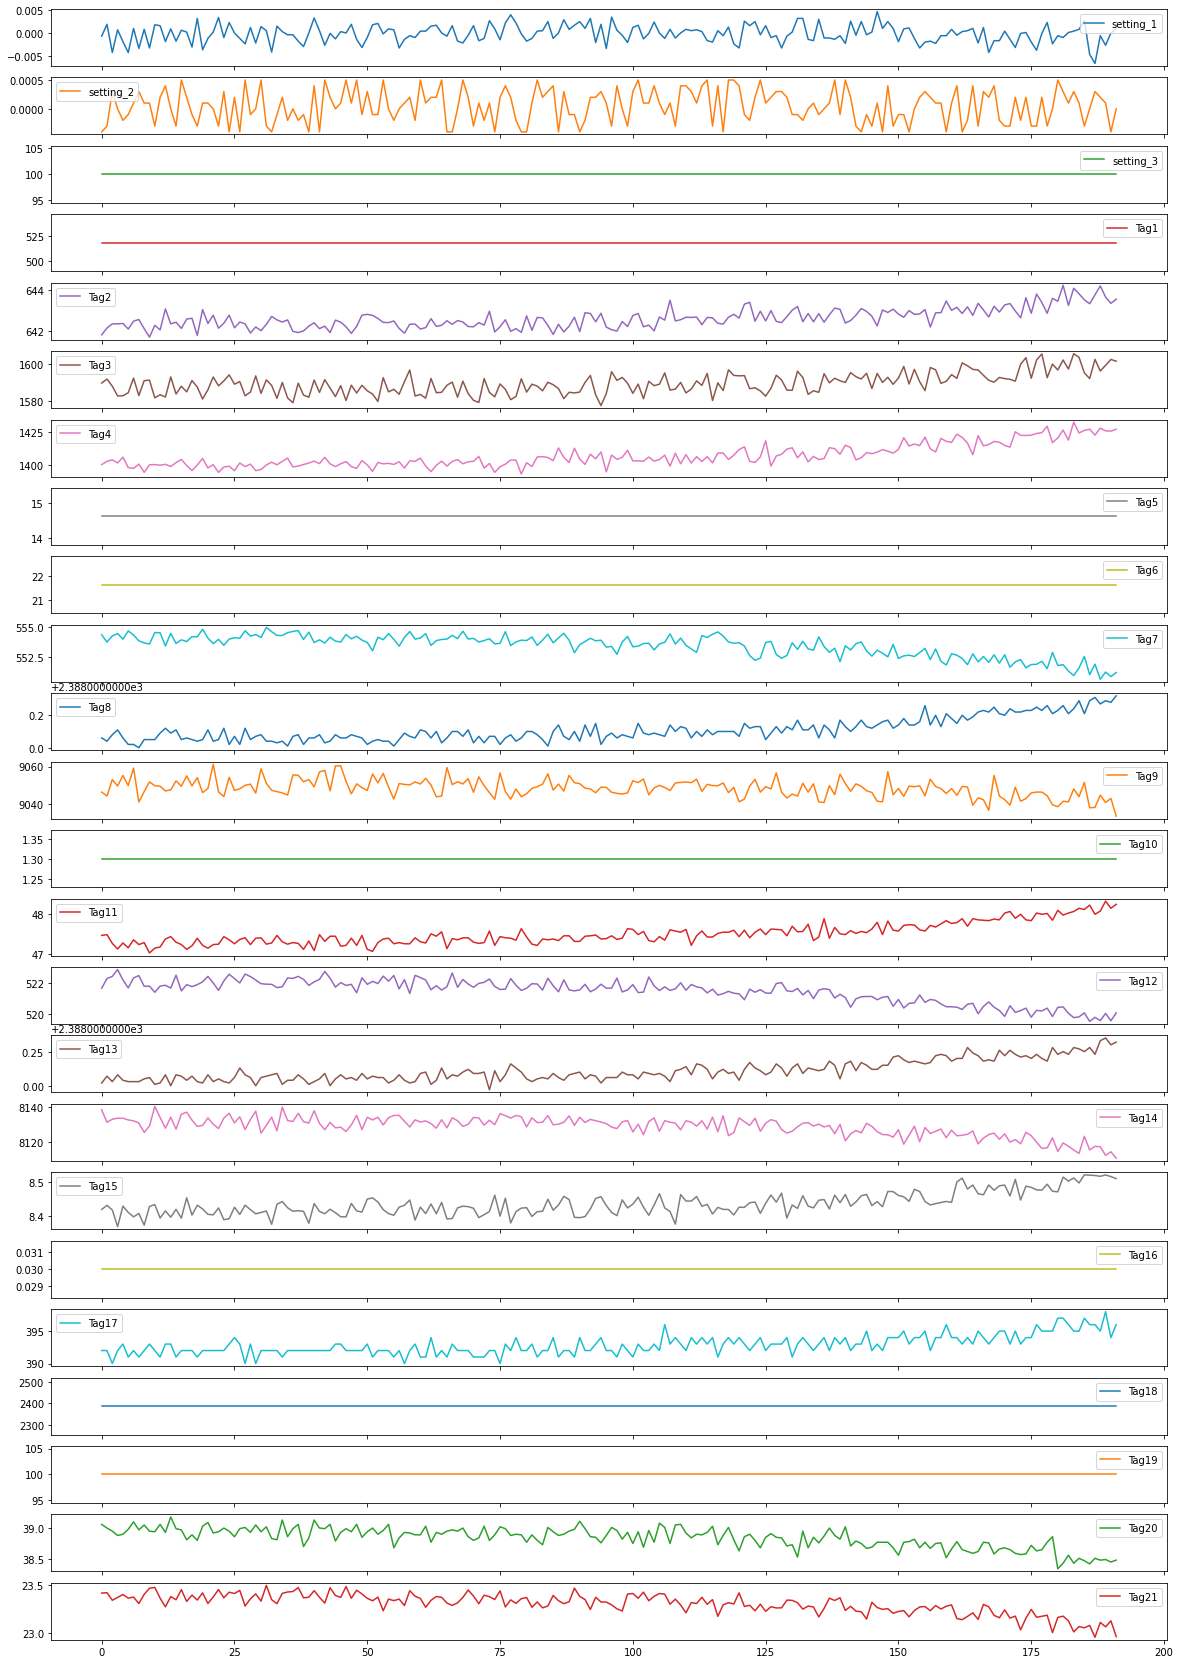

In [86]:
# It's a little messy to analyze all those numbers, let's make some viz

train_data.loc[train_data['Asset id'] == 1].iloc[:,2:].plot(subplots=True, sharex=True, figsize=(20,30));